# Let's explore EXFOR offerings for Ca40

In [1]:
import pickle
from pathlib import Path
from periodictable import elements
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import exfor_tools

Using database version x4i3_X4-2023-04-29 located in: /home/beyerk/mambaforge/envs/sage/lib/python3.11/site-packages/x4i3/data


In [3]:
from query_elastic import print_failed_parses, query_elastic_data, reattempt_parse

In [4]:
import jitr

In [5]:
proton = (1, 1)
neutron = (1, 0)

In [6]:
target =(208, 82)

In [7]:
(
    (entries_pp, failed_parses_pp),
    (entries_ppr, failed_parses_ppr),
    (entries_nn, failed_parses_nn),
) = query_elastic_data(target)


Parsing (p,p) ...
Found subentry C0081005 with the following columns:
['EN', 'ANG-CM', 'DATA-CM', 'DATA-ERR']
Found subentry C0893042 with the following columns:
['EN', 'ANG-CM', 'DATA-CM', 'ERR-S']
Found subentry C1019034 with the following columns:
['ERR-S', 'EN', 'ANG-CM', 'DATA-CM']
Found subentry E1201014 with the following columns:
['EN', 'ANG-CM', 'DATA-CM', 'DATA-ERR']
Found subentry E1846023 with the following columns:
['EN-RSL', 'E-RSL', 'E-LVL-ERR', 'EN', 'ANG-CM', 'DATA-CM']
Found subentry O0032025 with the following columns:
['EN', 'ANG-CM', 'DATA', 'ERR-S']
Failed to parse subentry O0049012:
	Subentry O0049012 has an ambiguous set of error labels:
		ERR-T, DATA-ERR, 
Failed to parse subentry O0142011:
	Subentry O0142011 has an ambiguous set of error labels:
		ERR-1, ERR-T, 
Found subentry O0157004 with the following columns:
['EN', 'ANG-ERR', 'DATA-ERR', 'ANG-CM', 'DATA-CM']
Found subentry O0166023 with the following columns:
['EN', 'ANG-ERR-D', 'ERR-DIG', 'ANG-CM', 'DAT

# $(p,p)$

## Handle failed parses for $(p,p)$

In [8]:
print_failed_parses(failed_parses=failed_parses_pp)

Entry: O0049
Subentry O0049012 has an ambiguous set of error labels:
		ERR-T, DATA-ERR, 
Entry: O0142
Subentry O0142011 has an ambiguous set of error labels:
		ERR-1, ERR-T, 
Entry: O0285
Subentry O0285002 has an ambiguous set of error labels:
		DATA-ERR, MONIT-ERR, 
Entry: O0391
Subentry O0391008 has an ambiguous set of error labels:
		ERR-1, ERR-2, ERR-3, ERR-4, ERR-T, 
Entry: T0101
Subentry T0101004 has an ambiguous set of error labels:
		DATA-ERR1, DATA-ERR, 


In [9]:
entries_pp["O0049"] = reattempt_parse(
    failed_parses_pp["O0049"],
    parsing_kwargs={
        "err_labels": [ "DATA-ERR", "ERR-T"],
        "err_treatment": "independent",
    },
)

Found subentry O0049012 with the following columns:
['EN', 'ERR-T', 'ANG-ERR', 'DATA-ERR', 'ANG-CM', 'DATA']


In [10]:
entries_pp["O0142"] = reattempt_parse(
    failed_parses_pp["O0142"],
    parsing_kwargs={
        "err_labels": [ "ERR-1", "ERR-T"],
        "err_treatment": "independent",
    },
)

Found subentry O0142011 with the following columns:
['EN', 'ERR-1', 'ANG-CM', 'DATA-CM', 'ERR-T']


In [11]:
# O0285 is deemed to have unreliable error estimation

In [12]:
entries_pp["O0391"] = reattempt_parse(
    failed_parses_pp["O0391"],
    parsing_kwargs={
        "err_labels": [ "ERR-T"],
        "err_treatment": "independent",
    },
)

Found subentry O0391008 with the following columns:
['EN', 'EN-ERR', 'EN-RSL', 'ERR-1', 'ERR-2', 'ERR-3', 'ERR-4', 'ANG-CM', 'DATA', 'ERR-T']


In [13]:
entries_pp["T0101"] = reattempt_parse(
    failed_parses_pp["T0101"],
    parsing_kwargs={
        "err_labels": ["DATA-ERR1", "DATA-ERR"],
        "err_treatment": "independent",
    },
)

Found subentry T0101004 with the following columns:
['DATA-ERR1', 'EN', 'ANG-CM', 'DATA-CM', 'DATA-ERR']


## Reject none-useful, discrepant our outlying experiments

In [14]:
#entries_to_ignore = ['C2700', 'O0598', 'C1019', 'O0142', 'O0187', 'O0191', 'O0166', 'O0157',  'O0285', 'O0049']
entries_pp

{'C0081': <exfor_tools.exfor_tools.ExforEntryAngularDistribution at 0x7d7cb7e7a690>,
 'C0893': <exfor_tools.exfor_tools.ExforEntryAngularDistribution at 0x7d7cb6606290>,
 'C1019': <exfor_tools.exfor_tools.ExforEntryAngularDistribution at 0x7d7cb6494d90>,
 'E1201': <exfor_tools.exfor_tools.ExforEntryAngularDistribution at 0x7d7cb659cb90>,
 'E1846': <exfor_tools.exfor_tools.ExforEntryAngularDistribution at 0x7d7cb6ae1c10>,
 'O0032': <exfor_tools.exfor_tools.ExforEntryAngularDistribution at 0x7d7cb6da7210>,
 'O0157': <exfor_tools.exfor_tools.ExforEntryAngularDistribution at 0x7d7cb73804d0>,
 'O0166': <exfor_tools.exfor_tools.ExforEntryAngularDistribution at 0x7d7cb647c490>,
 'O0208': <exfor_tools.exfor_tools.ExforEntryAngularDistribution at 0x7d7cb6e51550>,
 'O0211': <exfor_tools.exfor_tools.ExforEntryAngularDistribution at 0x7d7cb6c7be10>,
 'O0225': <exfor_tools.exfor_tools.ExforEntryAngularDistribution at 0x7d7cb7029210>,
 'O0272': <exfor_tools.exfor_tools.ExforEntryAngularDistribution 

# $(p,p)$ ratio

## handle failed parses for $(p,p)$ ratio

In [15]:
print_failed_parses(failed_parses=failed_parses_ppr)

Entry: O0211
Subentry O0211009 has an ambiguous set of error labels:
		DATA-ERR, ERR-T, 
Entry: O0287
Subentry O0287002 has an ambiguous set of error labels:
		ERR-1, DATA-ERR, 
Entry: O0300
Subentry O0300002 has an ambiguous set of error labels:
		ERR-1, ERR-2, DATA-ERR, 
Entry: O0302
Subentry O0302002 has an ambiguous set of error labels:
		DATA-ERR1, DATA-ERR2, ERR-DIG, 
Entry: O0328
Subentry O0328008 has an ambiguous set of error labels:
		ERR-2, DATA-ERR, ERR-T, 
Entry: O0552
Subentry O0552008 has an ambiguous set of error labels:
		DATA-ERR, ERR-T, 


In [16]:
entries_ppr["O0211"] = reattempt_parse(
    failed_parses_ppr["O0211"],
    parsing_kwargs={
        "err_labels": ["DATA-ERR", "ERR-T"],
        "err_treatment": "independent",
    },
)

Found subentry O0211009 with the following columns:
['EN', 'EN-RSL', 'ANG-ERR', 'DATA-ERR', 'ANG-CM', 'DATA', 'ERR-T']


In [17]:
entries_ppr["O0287"] = reattempt_parse(
    failed_parses_ppr["O0287"],
    parsing_kwargs={
        "err_labels": ["DATA-ERR", "ERR-1"],
        "err_treatment": "independent",
    },
)

Found subentry O0287002 with the following columns:
['EN', 'ERR-1', 'DATA-ERR', 'EN-RSL-FW', 'ANG-CM', 'DATA']


In [18]:
entries_ppr["O0300"] = reattempt_parse(
    failed_parses_ppr["O0300"],
    parsing_kwargs={
        "err_labels": ["DATA-ERR"],
        "err_treatment": "independent",
    },
)

Found subentry O0300002 with the following columns:
['EN', 'ERR-1', 'ERR-2', 'DATA-ERR', 'ANG-CM', 'DATA']


In [19]:
entries_ppr["O0302"] = reattempt_parse(
    failed_parses_ppr["O0302"],
    parsing_kwargs={
        "err_labels": ["DATA-ERR1", "DATA-ERR2", "ERR-DIG"],
        "err_treatment": "independent",
    },
)

Found subentry O0302002 with the following columns:
['EN', 'DATA-ERR1', 'DATA-ERR2', 'ANG-ERR-D', 'ERR-DIG', 'ANG-CM', 'DATA']


In [20]:
# O0328008 has been removed

In [21]:
entries_ppr["O0552"] = reattempt_parse(
    failed_parses_ppr["O0552"],
    parsing_kwargs={
        "err_labels": ["DATA-ERR", "ERR-T"],
        "err_treatment": "independent",
    },
)

Found subentry O0552008 with the following columns:
['EN', 'ANG-ERR', 'DATA-ERR', 'ANG-CM', 'DATA', 'ERR-T']


## Reject non-useful, discrepant our outlying experiments

In [22]:
#  entries_to_ignore = ['O0490','C1019']

del entries_ppr['O0490']

## handle failed parses for $(n,n)$ ratio

In [23]:
print_failed_parses(failed_parses=failed_parses_nn)

Entry: 12701
Subentry 12701005 has an ambiguous set of error labels:
		DATA-ERR2, DATA-ERR1, 
Entry: 14317
Subentry 14317003 has an ambiguous set of error labels:
		ERR-1, ERR-2, ERR-T, 
Entry: 22847
Subentry 22847003 has an ambiguous set of error labels:
		ERR-2, ERR-3, ERR-T, ERR-S, ERR-1, 
Entry: 22987
Subentry 22987007 has an ambiguous set of error labels:
		ERR-3, DATA-ERR, 


In [24]:
entries_nn["12701"] = reattempt_parse(
    failed_parses_nn["12701"],
    parsing_kwargs={
        "err_labels": ["DATA-ERR1", "DATA-ERR2"], # 2 is normalization
        "err_treatment": "independent",
    },
)

Found subentry 12701005 with the following columns:
['DATA-ERR2', 'EN', 'ANG-CM', 'DATA-CM', 'DATA-ERR1']


In [25]:
entries_nn["14317"] = reattempt_parse(
    failed_parses_nn["14317"],
    parsing_kwargs={
        "err_labels": [ "ERR-T", "ERR-1", "ERR-2"],
        "err_treatment": "independent",
    },
)

Found subentry 14317002 with the following columns:
['ERR-1', 'ERR-2', 'EN', 'ANG-CM', 'DATA-CM', 'ERR-T']
Found subentry 14317003 with the following columns:
['ERR-1', 'ERR-2', 'EN', 'ANG-CM', 'DATA-CM', 'ERR-T']


In [26]:
entries_nn["22847"] = reattempt_parse(
    failed_parses_nn["22847"],
    parsing_kwargs={
        "err_labels": [ "ERR-T", "ERR-2"],
        "err_treatment": "independent",
    },
)

Found subentry 22847003 with the following columns:
['EN', 'EN-ERR', 'EN-RSL-FW', 'ERR-2', 'ERR-3', 'ANG-RSL', 'ANG-CM', 'DATA-CM', 'ERR-T', 'ERR-S', 'ERR-1']


In [27]:
entries_nn["22987"] = reattempt_parse(
    failed_parses_nn["22987"],
    parsing_kwargs={
        "err_labels": ["ERR-T", "ERR-1","ERR-3"],
        "err_treatment": "independent",
    },
)

Found subentry 22987004 with the following columns:
['EN', 'EN-ERR', 'EN-RSL-FW', 'ERR-3', 'ANG-RSL', 'ANG-CM', 'DATA-CM', 'ERR-T', 'ERR-S', 'ERR-1']
Found subentry 22987007 with the following columns:
['EN', 'EN-ERR', 'EN-RSL-FW', 'ERR-3', 'ANG-RSL', 'ANG-CM', 'DATA-CM', 'DATA-ERR', 'MISC1', 'MISC2']
Failed to parse subentry 22987007:
	Error while parsing 22987007: Subentry does not have a column called ERR-T


In [28]:
# entries_to_ignore = ['40288', '23059', '22987','14317']
del entries_nn['14317'] # duplicate

# Plotting

## Plot $(p,p)$

In [29]:
measurements_categorized = exfor_tools.categorize_measurements_by_energy(
    entries_pp, min_num_pts=4
)

In [30]:
[[m.Einc for m in l] for l in measurements_categorized]

[[16.0, 16.0],
 [30.3],
 [30.8],
 [35.0],
 [39.7],
 [40.0],
 [55.09],
 [61.4],
 [65.0, 65.0],
 [80.0],
 [121.0],
 [156.0],
 [160.0],
 [182.0],
 [200.0, 200.0]]

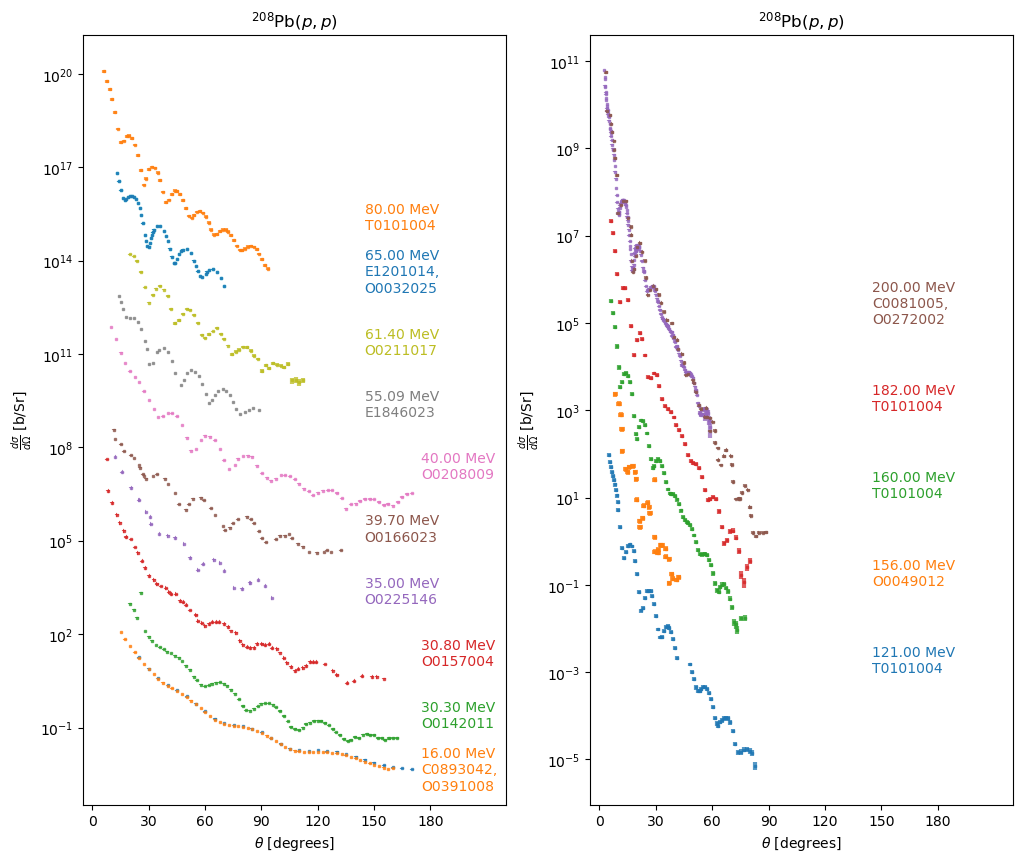

In [31]:
n_per_plot = 10
N = len(measurements_categorized)
num_plots = N // n_per_plot
left_over = N % n_per_plot
if left_over > 0:
    num_plots += 1


fig, axes = plt.subplots(1, num_plots, figsize=(6 * num_plots, 10))
if not isinstance(axes,np.ndarray):
    axes = [axes]
for i in range(num_plots):
    idx0 = i * n_per_plot
    if i == num_plots - 1:
        idxf = N 
    else:
        idxf = (i + 1) * n_per_plot

    exfor_tools.plot_angular_distributions(
        measurements_categorized[idx0:idxf],
        axes[i],
        offsets=100,
        data_symbol=list(entries_pp.values())[0].data_symbol,
        rxn_label=list(entries_pp.values())[0].rxn,
        label_kwargs={
            "label_xloc_deg": None,
            "label_offset_factor": 0.001,
            "label_energy_err": False,
            "label_offset": False,
            "label_incident_energy": True,
            "label_excitation_energy": False,
            "label_exfor": True,
        },
    )
    axes[i].set_xlim([-5, 220])

## plot $(p,p)$ ratio

In [32]:
measurements_categorized = exfor_tools.categorize_measurements_by_energy(
    entries_ppr, min_num_pts=4
)

In [33]:
[[(m.subentry, m.Einc) for m in l] for l in measurements_categorized]

[[('O0552008', 12.98)],
 [('C1019035', 22.2)],
 [('O0788009', 49.35)],
 [('O0211009', 61.4)],
 [('O0300002', 100.4)],
 [('O0302002', 160.0)],
 [('O0287002', 185.0)]]

(0.0, 70.0)

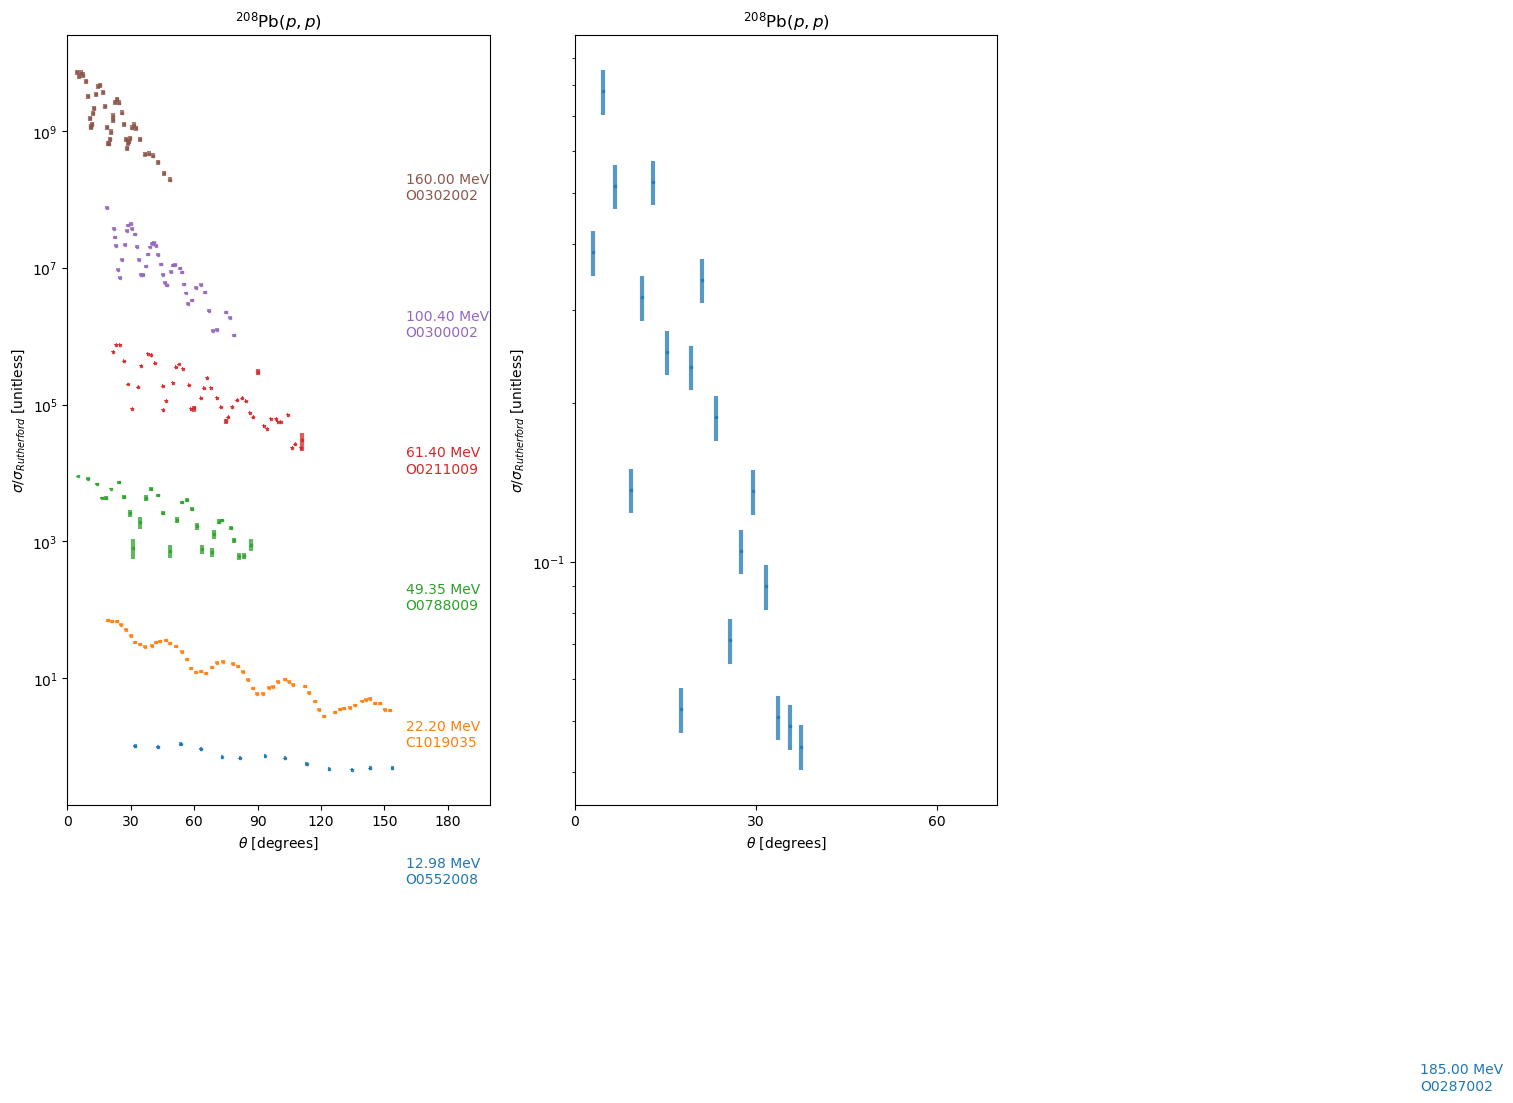

In [34]:
n_per_plot = 6
N = len(measurements_categorized)
num_plots = N // n_per_plot
left_over = N % n_per_plot
if left_over > 0:
    num_plots += 1

label_xloc= [160,140,50]

fig, axes = plt.subplots(1, num_plots, figsize=(6 * num_plots, 10))
if not isinstance(axes,np.ndarray):
    axes = [axes]

for i in range(num_plots):
    idx0 = i * n_per_plot
    if i == num_plots - 1:
        idxf = N 
    else:
        idxf = (i + 1) * n_per_plot
    exfor_tools.plot_angular_distributions(
        measurements_categorized[idx0:idxf],
        axes[i],
        offsets=100,
        data_symbol=list(entries_ppr.values())[0].data_symbol,
        rxn_label=list(entries_ppr.values())[0].rxn,
        label_kwargs={
            "label_xloc_deg": label_xloc[i],
            "label_offset_factor": 0.01,
            "label_energy_err": False,
            "label_offset": False,
            "label_incident_energy": True,
            "label_excitation_energy": False,
            "label_exfor": True,
        },
    )
   # axes[i].set_xlim([-5, 220])
axes[0].set_xlim([0,200])
axes[-1].set_xlim([0,70])

## Plot $(n,n)$

In [35]:
measurements_categorized = exfor_tools.categorize_measurements_by_energy(
    entries_nn, min_num_pts=5
)

In [36]:
[[m.Einc for m in l] for l in measurements_categorized]

[[11.0],
 [13.9],
 [16.9],
 [20.0, 20.0],
 [22.0],
 [24.0],
 [26.0],
 [30.3],
 [40.0],
 [65.0],
 [75.0],
 [85.0],
 [95.0],
 [96.0, 96.0],
 [107.5],
 [127.5],
 [155.0],
 [185.0]]

(0.0, 90.0)

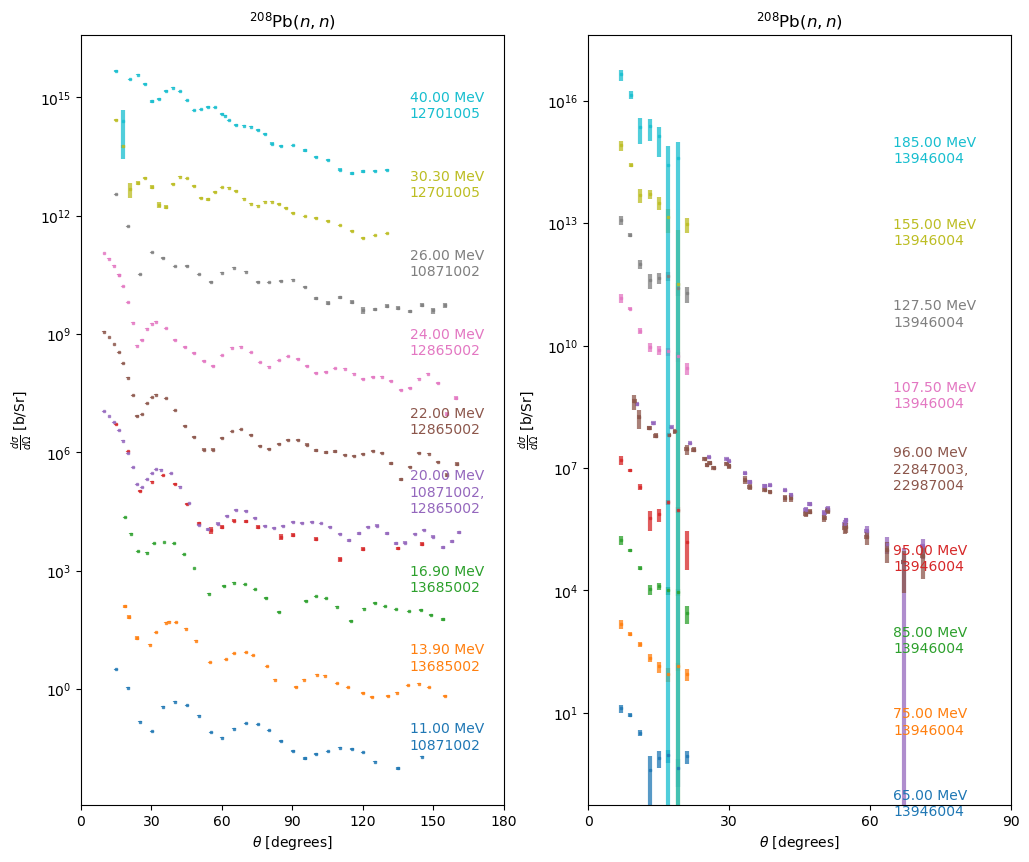

In [37]:
n_per_plot = 9
N = len(measurements_categorized)
num_plots = N // n_per_plot
left_over = N % n_per_plot
if left_over > 0:
    num_plots += 1
label_xloc= [140,65]

fig, axes = plt.subplots(1, num_plots, figsize=(6 * num_plots, 10))
if not isinstance(axes,np.ndarray):
    axes = [axes]

for i in range(num_plots):
    idx0 = i * n_per_plot
    if i == num_plots - 1:
        idxf = N 
    else:
        idxf = (i + 1) * n_per_plot

    exfor_tools.plot_angular_distributions(
        measurements_categorized[idx0:idxf],
        axes[i],
        offsets=100,
        data_symbol=list(entries_nn.values())[0].data_symbol,
        rxn_label=list(entries_nn.values())[0].rxn,
        label_kwargs={
            "label_xloc_deg": label_xloc[i],
            "label_offset_factor": 0.03,
            "label_energy_err": False,
            "label_offset": False,
            "label_incident_energy": True,
            "label_excitation_energy": False,
            "label_exfor": True,
        },
    )
#axes[0].set_xlim([-20, 180])
axes[1].set_xlim([0,90])

# Write data to disk

In [38]:
A, Z = target
with open(f"{elements[Z]}{A}_diff_xs.pkl", "wb") as f:
    pickle.dump({"n,n": entries_nn, "p,p": { "absolute" :  entries_pp , "ratio" : entries_ppr }}, f)